Untersuche die Wirkung der Inhibitoren JD359 und BH267.meta auf den Influx von Lactat durch PfFNT über ilacco1.0 Biosensor

In [1]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)
4. fit_linear(data_frames)
5. plot_linear_fits(results, title, save_path, uniform_axes)
6. plot_slope_histogram(results, save_path, figsize)


In [2]:
data_path = '/workspaces/EWT/EWT7/data/EWT7.ods'
df_E_PfFNT_100µM_JD359 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_E_PfFNT_100µM_BH267m = pd.read_excel(data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_E_PfFNT_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)

df_E_PfFNT_FP_100µM_JD359 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet7", skiprows=36)
df_E_PfFNT_FP_100µM_BH267m = pd.read_excel(data_path, engine='odf', sheet_name="Sheet8", skiprows=36)
df_E_PfFNT_FP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet6", skiprows=36)

# Ersetze 'OVER' durch NaN
print(df_E_PfFNT_FP)

    Startzeit:  27.11.2025 13:45:23 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          NaN                  NaN        NaN        NaN        NaN   
1          NaN                  NaN        NaN        NaN        NaN   
2   Zyklus Nr.                    1          2          3          4   
3     Zeit [s]                    0         10         20         30   
4   Temp. [°C]                   --         --         --         --   
5           H1                39645      38157      36534      35961   
6           H2                38370      36846      35305      34084   
7           H3                39310      36664      33860      33393   
8          NaN                  NaN        NaN        NaN        NaN   
9          NaN                  NaN        NaN        NaN        NaN   
10         NaN                  NaN        NaN        NaN        NaN   
11         NaN                  NaN        NaN        NaN        NaN   
12    Endzeit:  27.11.2025 13:53:27        NaN        NaN       

In [3]:
# Daten Verarbeitung
#JD359
E_PfFNT_100µM_JD359 = dataframe1(df_E_PfFNT_100µM_JD359,3,5,6,7)
E_PfFNT_100µM_BH267m = dataframe1(df_E_PfFNT_100µM_BH267m,3,5,6,7)
E_PfFNT_ilacco1_0 = dataframe1(df_E_PfFNT_ilacco1_0,3,5,6,7)

E_PfFNT_FP_100µM_JD359 = dataframe1(df_E_PfFNT_FP_100µM_JD359,3,5,6,7)
E_PfFNT_FP_100µM_BH267m = dataframe1(df_E_PfFNT_FP_100µM_BH267m,3,5,6,7)
E_PfFNT_FP = dataframe1(df_E_PfFNT_FP,3,5,6,7)


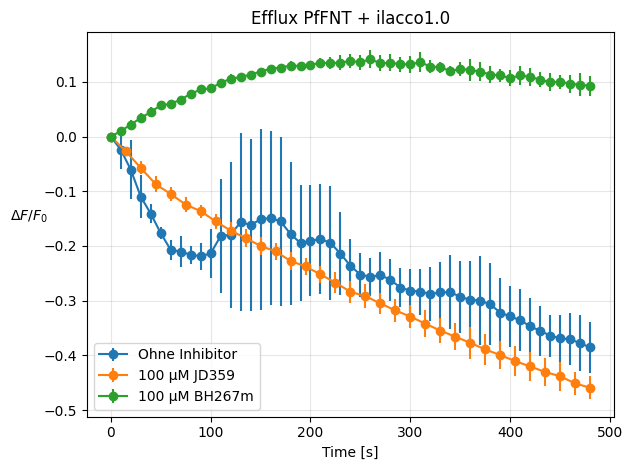

In [4]:
# Plot Efflux + ilacco1.0
df_PfFNT = [
    E_PfFNT_ilacco1_0,
    E_PfFNT_100µM_JD359,
    E_PfFNT_100µM_BH267m]
label = ["Ohne Inhibitor","100 µM JD359","100 µM BH267m"]
for df,label in zip(df_PfFNT, label):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)
plt.title(f'Efflux PfFNT + ilacco1.0')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()

outpath = os.path.join('..', 'figures', 'Efflux PfFNT+ilacco1.0+Inhibitor.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()


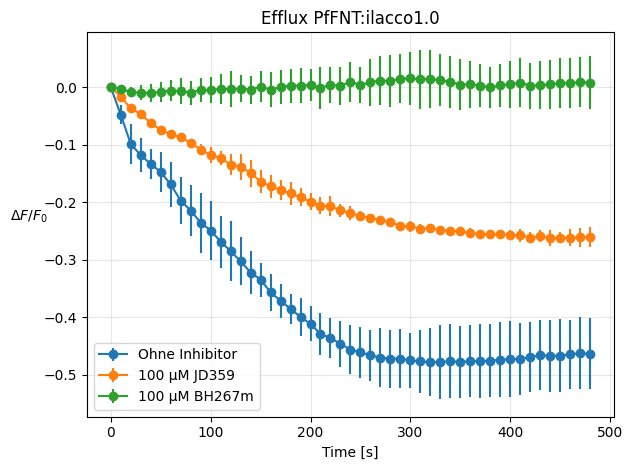

In [5]:
# Plot Efflux PfFNT:ilacco1.0
df_PfFNT_FP = [E_PfFNT_FP,E_PfFNT_FP_100µM_JD359,
                E_PfFNT_FP_100µM_BH267m,
                ]
label_FP = ["Ohne Inhibitor","100 µM JD359","100 µM BH267m","Ohne Inhibitor"]
for df, lbl in zip(df_PfFNT_FP, label_FP):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=lbl)

plt.title(f'Efflux PfFNT:ilacco1.0')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figures', 'Efflux PfFNTi-lacco1.0(FP)+Inhibitor.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

Saved individual fits: ../figures/PfFNT_Inhibitor_individual_fits.png


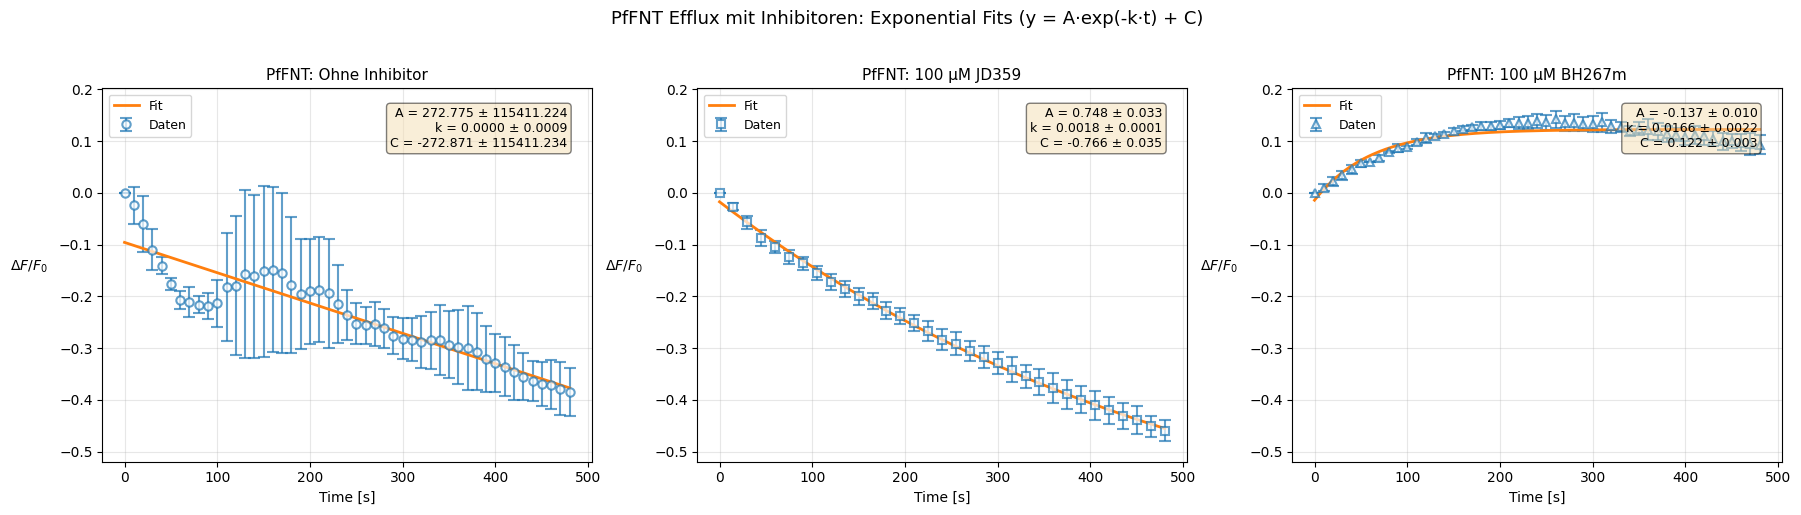

In [6]:
# Exponentieller Fit für PfFNT mit Inhibitoren
# Fit-Funktion: y = A*exp(-k*t) + C
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('Ohne Inhibitor', 'o', E_PfFNT_ilacco1_0),
    ('100 µM JD359', 's', E_PfFNT_100µM_JD359),
    ('100 µM BH267m', '^', E_PfFNT_100µM_BH267m)
]

# Erstelle 1x3 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames):
    ax = axes[idx]
    
    # Extrahiere Daten
    times = df['Time'].values
    means = df['Mittelwerte'].values
    stds = df['Standardabweichung'].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Sammle für Skalierung
    all_times.extend(times_clean)
    all_values.extend(means_clean)
    
    # Plotte Originaldaten
    ax.errorbar(times_clean, means_clean, yerr=stds_clean,
                marker=marker, linestyle='', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6,
                label='Daten', alpha=0.7, color='C0')
    
    # Schätze initiale Parameter für den Fit
    A_guess = means_clean[0] - means_clean[-1] if len(means_clean) > 0 else 1.0
    C_guess = means_clean[-1] if len(means_clean) > 0 else 0.0
    k_guess = 0.01
    
    try:
        # Führe exponentiellen Fit durch
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean,
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten aus der Kovarianzmatrix
        A_err = np.sqrt(pcov[0, 0])
        k_err = np.sqrt(pcov[1, 1])
        C_err = np.sqrt(pcov[2, 2])
        
        # Erstelle Fit-Kurve
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
        y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Fit')
        
        # Füge Fit-Parameter als Textbox hinzu
        textstr = f'A = {A_fit:.3f} ± {A_err:.3f}\nk = {k_fit:.4f} ± {k_err:.4f}\nC = {C_fit:.3f} ± {C_err:.3f}'
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)}',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=8, color='red')
    
    # Formatierung
    ax.set_title(f'PfFNT: {name}', fontsize=11)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# Setze uniforme Achsenskalierung für alle Subplots
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('PfFNT Efflux mit Inhibitoren: Exponential Fits (y = A·exp(-k·t) + C)', fontsize=13, y=1.02)
plt.tight_layout()

# Speichern
os.makedirs(os.path.join('..', 'figures'), exist_ok=True)
outpath = os.path.join('..', 'figures', 'PfFNT_Inhibitor_individual_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved individual fits: {outpath}')
plt.show()

Saved parameter comparison: ../figures/PfFNT_Inhibitor_parameter_comparison.png


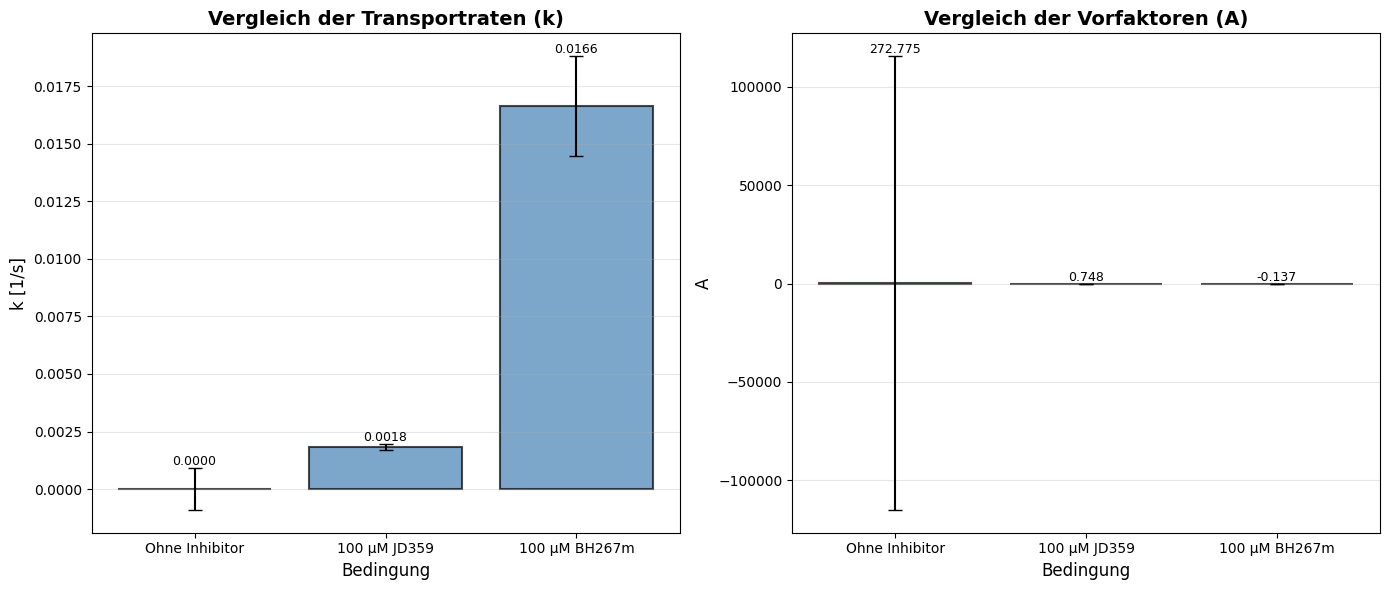


=== Fit-Parameter Zusammenfassung ===
Bedingung                 k [1/s]         A              
-------------------------------------------------------
Ohne Inhibitor            0.0000±0.0009   272.775±115411.224
100 µM JD359              0.0018±0.0001   0.748±0.033
100 µM BH267m             0.0166±0.0022   -0.137±0.010


In [7]:
# Histogramme für Fit-Parameter: k (Transportrate) und A (Vorfaktor)
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('Ohne Inhibitor', 'o', E_PfFNT_ilacco1_0),
    ('100 µM JD359', 's', E_PfFNT_100µM_JD359),
    ('100 µM BH267m', '^', E_PfFNT_100µM_BH267m)
]

# Listen für Parameter und Unsicherheiten
names = []
k_values = []
k_errors = []
A_values = []
A_errors = []

# Führe Fits durch und sammle Parameter
for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        
        # Speichere Werte
        names.append(name)
        k_values.append(k_fit)
        k_errors.append(k_err)
        A_values.append(A_fit)
        A_errors.append(A_err)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle zwei Histogramme nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogramm 1: Transportrate k
x_pos = np.arange(len(names))
bars1 = ax1.bar(x_pos, k_values, yerr=k_errors, capsize=5, 
                color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Bedingung', fontsize=12)
ax1.set_ylabel('k [1/s]', fontsize=12)
ax1.set_title('Vergleich der Transportraten (k)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=0, ha='center', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, k_val, k_err) in enumerate(zip(bars1, k_values, k_errors)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + k_err,
            f'{k_val:.4f}', ha='center', va='bottom', fontsize=9)

# Histogramm 2: Vorfaktor A
bars2 = ax2.bar(x_pos, A_values, yerr=A_errors, capsize=5,
                color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Bedingung', fontsize=12)
ax2.set_ylabel('A', fontsize=12)
ax2.set_title('Vergleich der Vorfaktoren (A)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(names, rotation=0, ha='center', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, A_val, A_err) in enumerate(zip(bars2, A_values, A_errors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
            f'{A_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'PfFNT_Inhibitor_parameter_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved parameter comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Fit-Parameter Zusammenfassung ===')
print(f'{"Bedingung":<25} {"k [1/s]":<15} {"A":<15}')
print('-' * 55)
for name, k, k_e, A, A_e in zip(names, k_values, k_errors, A_values, A_errors):
    print(f'{name:<25} {k:.4f}±{k_e:.4f}   {A:.3f}±{A_e:.3f}')

Saved individual fits: ../figures/PfFNT_FP_Inhibitor_individual_fits.png


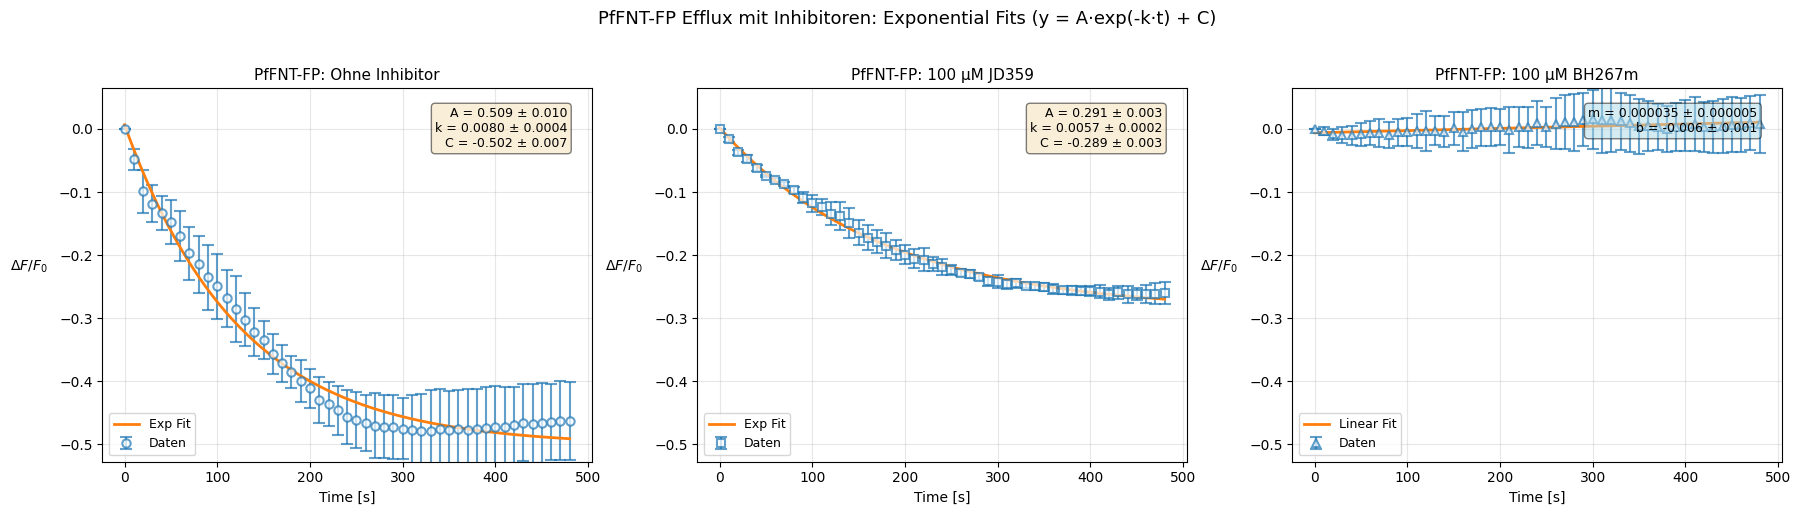

In [8]:
# Exponentieller Fit für PfFNT-FP mit Inhibitoren
# Fit-Funktion: y = A*exp(-k*t) + C
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames_fp = [
    ('Ohne Inhibitor', 'o', E_PfFNT_FP, 'exp'),
    ('100 µM JD359', 's', E_PfFNT_FP_100µM_JD359, 'exp'),
    ('100 µM BH267m', '^', E_PfFNT_FP_100µM_BH267m, 'linear')
]

# Erstelle 1x3 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df, fit_type) in enumerate(data_frames_fp):
    ax = axes[idx]
    
    # Extrahiere Daten
    times = df['Time'].values
    means = df['Mittelwerte'].values
    stds = df['Standardabweichung'].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Sammle für Skalierung
    all_times.extend(times_clean)
    all_values.extend(means_clean)
    
    # Plotte Originaldaten
    ax.errorbar(times_clean, means_clean, yerr=stds_clean,
                marker=marker, linestyle='', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6,
                label='Daten', alpha=0.7, color='C0')
    
    try:
        if fit_type == 'linear':
            # Linearer Fit: y = m*t + b
            coeffs = np.polyfit(times_clean, means_clean, 1)
            m_fit, b_fit = coeffs
            
            # Berechne Unsicherheiten für linearen Fit
            y_pred = np.polyval(coeffs, times_clean)
            residuals = means_clean - y_pred
            s_err = np.sqrt(np.sum(residuals**2) / (len(times_clean) - 2))
            t_mean = np.mean(times_clean)
            s_xx = np.sum((times_clean - t_mean)**2)
            m_err = s_err / np.sqrt(s_xx)
            b_err = s_err * np.sqrt(1/len(times_clean) + t_mean**2/s_xx)
            
            # Erstelle Fit-Kurve
            t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
            y_fit = m_fit * t_fit + b_fit
            
            # Plotte Fit
            ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Linear Fit')
            
            # Füge Fit-Parameter als Textbox hinzu
            textstr = f'm = {m_fit:.6f} ± {m_err:.6f}\nb = {b_fit:.3f} ± {b_err:.3f}'
            ax.text(0.95, 0.95, textstr, transform=ax.transAxes,
                    fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        else:
            # Exponentieller Fit
            A_guess = means_clean[0] - means_clean[-1] if len(means_clean) > 0 else 1.0
            C_guess = means_clean[-1] if len(means_clean) > 0 else 0.0
            k_guess = 0.01
            
            popt, pcov = curve_fit(exp_decay, times_clean, means_clean,
                                  p0=[A_guess, k_guess, C_guess],
                                  maxfev=10000)
            
            A_fit, k_fit, C_fit = popt
            
            # Berechne Unsicherheiten aus der Kovarianzmatrix
            A_err = np.sqrt(pcov[0, 0])
            k_err = np.sqrt(pcov[1, 1])
            C_err = np.sqrt(pcov[2, 2])
            
            # Erstelle Fit-Kurve
            t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
            y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
            
            # Plotte Fit
            ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Exp Fit')
            
            # Füge Fit-Parameter als Textbox hinzu
            textstr = f'A = {A_fit:.3f} ± {A_err:.3f}\nk = {k_fit:.4f} ± {k_err:.4f}\nC = {C_fit:.3f} ± {C_err:.3f}'
            ax.text(0.95, 0.95, textstr, transform=ax.transAxes,
                    fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)}',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=8, color='red')
    
    # Formatierung
    ax.set_title(f'PfFNT-FP: {name}', fontsize=11)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# Setze uniforme Achsenskalierung für alle Subplots
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('PfFNT-FP Efflux mit Inhibitoren: Exponential Fits (y = A·exp(-k·t) + C)', fontsize=13, y=1.02)
plt.tight_layout()

# Speichern
outpath = os.path.join('..', 'figures', 'PfFNT_FP_Inhibitor_individual_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved individual fits: {outpath}')
plt.show()

Saved parameter comparison: ../figures/PfFNT_FP_Inhibitor_parameter_comparison.png


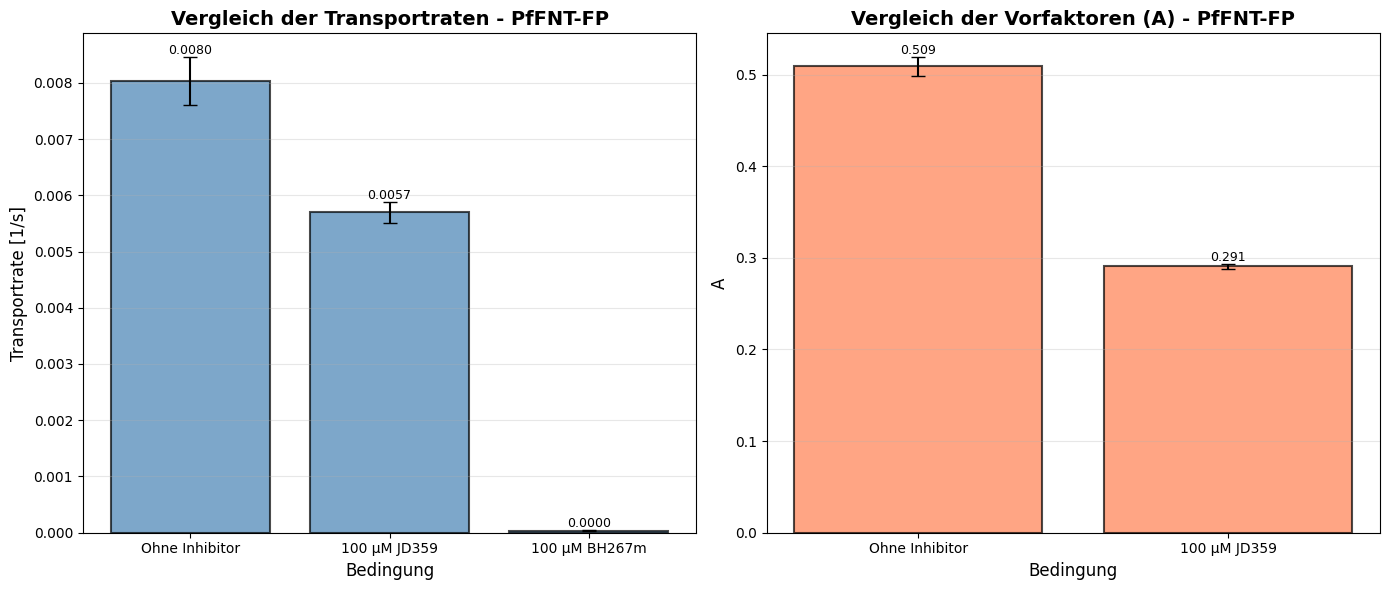


=== Fit-Parameter Zusammenfassung (PfFNT-FP) ===
Bedingung                 Fit-Typ      Parameter                     
----------------------------------------------------------------------
Ohne Inhibitor            Exponentiell k = 0.0080±0.0004, A = 0.509±0.010
100 µM JD359              Exponentiell k = 0.0057±0.0002, A = 0.291±0.003
100 µM BH267m             Linear       m = 0.000035±0.000005


In [9]:
# Histogramme für Fit-Parameter: k (Transportrate) und A (Vorfaktor) - PfFNT-FP
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames_fp = [
    ('Ohne Inhibitor', 'o', E_PfFNT_FP, 'exp'),
    ('100 µM JD359', 's', E_PfFNT_FP_100µM_JD359, 'exp'),
    ('100 µM BH267m', '^', E_PfFNT_FP_100µM_BH267m, 'linear')
]

# Listen für Parameter und Unsicherheiten
names_fp = []
k_values_fp = []
k_errors_fp = []
A_values_fp = []
A_errors_fp = []
m_values_fp = []  # Für lineare Fits
m_errors_fp = []

# Führe Fits durch und sammle Parameter
for name, marker, df, fit_type in data_frames_fp:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        if fit_type == 'linear':
            # Linearer Fit: y = m*t + b
            coeffs = np.polyfit(times_clean, means_clean, 1)
            m_fit, b_fit = coeffs
            
            # Berechne Unsicherheiten
            y_pred = np.polyval(coeffs, times_clean)
            residuals = means_clean - y_pred
            s_err = np.sqrt(np.sum(residuals**2) / (len(times_clean) - 2))
            t_mean = np.mean(times_clean)
            s_xx = np.sum((times_clean - t_mean)**2)
            m_err = s_err / np.sqrt(s_xx)
            
            # Speichere Werte (für linearen Fit verwenden wir m als "k" und setzen A auf 0)
            names_fp.append(name)
            k_values_fp.append(0)  # Kein k für linearen Fit
            k_errors_fp.append(0)
            A_values_fp.append(0)  # Kein A für linearen Fit
            A_errors_fp.append(0)
            m_values_fp.append(m_fit)
            m_errors_fp.append(m_err)
        else:
            # Startparameter schätzen
            A_guess = means_clean[0] - means_clean[-1]
            C_guess = means_clean[-1]
            k_guess = 0.01
            
            popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                                  p0=[A_guess, k_guess, C_guess],
                                  maxfev=10000)
            
            A_fit, k_fit, C_fit = popt
            
            # Berechne Unsicherheiten
            A_err = np.sqrt(pcov[0,0])
            k_err = np.sqrt(pcov[1,1])
            
            # Speichere Werte
            names_fp.append(name)
            k_values_fp.append(k_fit)
            k_errors_fp.append(k_err)
            A_values_fp.append(A_fit)
            A_errors_fp.append(A_err)
            m_values_fp.append(0)  # Kein m für exponentiellen Fit
            m_errors_fp.append(0)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle zwei Histogramme nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogramm 1: Transportrate (k für exponentielle Fits, m für lineare Fits)
transport_names = []
transport_values = []
transport_errors = []

for i, name in enumerate(names_fp):
    transport_names.append(name)
    if m_values_fp[i] != 0:  # Linearer Fit - verwende m als Transportrate
        transport_values.append(abs(m_values_fp[i]))  # Betrag, da negative Steigung
        transport_errors.append(m_errors_fp[i])
    else:  # Exponentieller Fit - verwende k
        transport_values.append(k_values_fp[i])
        transport_errors.append(k_errors_fp[i])

x_pos = np.arange(len(transport_names))
bars1 = ax1.bar(x_pos, transport_values, yerr=transport_errors, capsize=5, 
                color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Bedingung', fontsize=12)
ax1.set_ylabel('Transportrate [1/s]', fontsize=12)
ax1.set_title('Vergleich der Transportraten - PfFNT-FP', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(transport_names, rotation=0, ha='center', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, t_val, t_err) in enumerate(zip(bars1, transport_values, transport_errors)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + t_err,
            f'{t_val:.4f}', ha='center', va='bottom', fontsize=9)

# Histogramm 2: Vorfaktor A (nur exponentielle Fits)
exp_indices = [i for i, m in enumerate(m_values_fp) if m == 0]
if exp_indices:
    exp_names = [names_fp[i] for i in exp_indices]
    exp_A_values = [A_values_fp[i] for i in exp_indices]
    exp_A_errors = [A_errors_fp[i] for i in exp_indices]
    
    x_pos_A = np.arange(len(exp_names))
    bars2 = ax2.bar(x_pos_A, exp_A_values, yerr=exp_A_errors, capsize=5,
                    color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
    ax2.set_xlabel('Bedingung', fontsize=12)
    ax2.set_ylabel('A', fontsize=12)
    ax2.set_title('Vergleich der Vorfaktoren (A) - PfFNT-FP', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos_A)
    ax2.set_xticklabels(exp_names, rotation=0, ha='center', fontsize=10)
    ax2.grid(axis='y', alpha=0.3)
    
    # Füge Werte über den Balken hinzu
    for i, (bar, A_val, A_err) in enumerate(zip(bars2, exp_A_values, exp_A_errors)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
                f'{A_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'PfFNT_FP_Inhibitor_parameter_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved parameter comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Fit-Parameter Zusammenfassung (PfFNT-FP) ===')
print(f'{"Bedingung":<25} {"Fit-Typ":<12} {"Parameter":<30}')
print('-' * 70)
for i, name in enumerate(names_fp):
    if m_values_fp[i] != 0:  # Linearer Fit
        print(f'{name:<25} {"Linear":<12} m = {m_values_fp[i]:.6f}±{m_errors_fp[i]:.6f}')
    else:  # Exponentieller Fit
        print(f'{name:<25} {"Exponentiell":<12} k = {k_values_fp[i]:.4f}±{k_errors_fp[i]:.4f}, A = {A_values_fp[i]:.3f}±{A_errors_fp[i]:.3f}')

Saved initial flux comparison: ../figures/Initial_Flux_Comparison.png


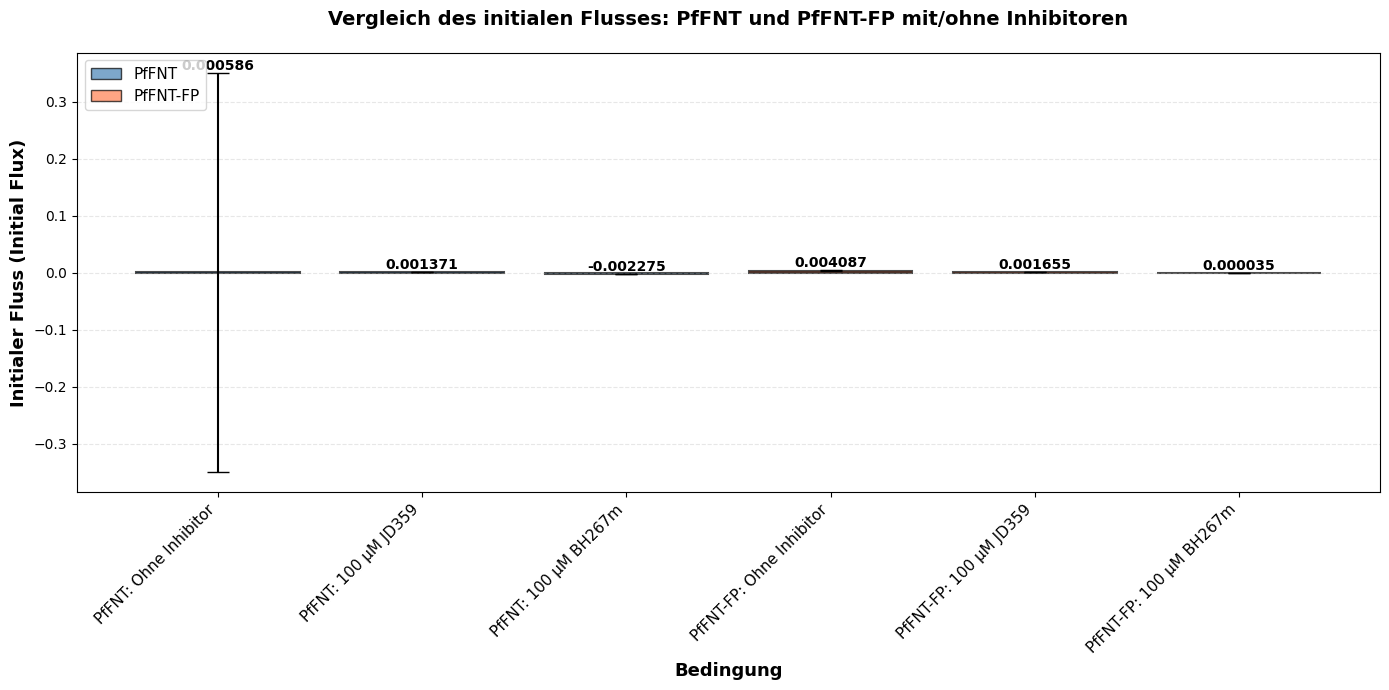


=== Initialer Fluss Zusammenfassung ===
Bedingung                      Initialer Fluss     
--------------------------------------------------
PfFNT: Ohne Inhibitor          0.000586±0.350715
PfFNT: 100 µM JD359            0.001371±0.000114
PfFNT: 100 µM BH267m           -0.002275±0.000337
PfFNT-FP: Ohne Inhibitor       0.004087±0.000231
PfFNT-FP: 100 µM JD359         0.001655±0.000056
PfFNT-FP: 100 µM BH267m        0.000035±0.000005


In [10]:
# Histogramm: Vergleich des initialen Flusses (Initial Flux)
# Für exponentielle Fits: k * A (k ist Transportrate, A ist Vorfaktor)
# Für lineare Fits: m (Steigung)

from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

# Kombiniere beide Datensätze (PfFNT + PfFNT-FP) für vollständigen Vergleich
all_data_frames = [
    ('PfFNT: Ohne Inhibitor', 'o', E_PfFNT_ilacco1_0, 'exp'),
    ('PfFNT: 100 µM JD359', 's', E_PfFNT_100µM_JD359, 'exp'),
    ('PfFNT: 100 µM BH267m', '^', E_PfFNT_100µM_BH267m, 'exp'),
    ('PfFNT-FP: Ohne Inhibitor', 'o', E_PfFNT_FP, 'exp'),
    ('PfFNT-FP: 100 µM JD359', 's', E_PfFNT_FP_100µM_JD359, 'exp'),
    ('PfFNT-FP: 100 µM BH267m', '^', E_PfFNT_FP_100µM_BH267m, 'linear')
]

initial_flux_names = []
initial_flux_values = []
initial_flux_errors = []

# Berechne initialen Fluss für alle Datensätze
for name, marker, df, fit_type in all_data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        if fit_type == 'linear':
            # Linearer Fit: y = m*t + b
            # Initialer Fluss = m (Steigung)
            coeffs = np.polyfit(times_clean, means_clean, 1)
            m_fit, b_fit = coeffs
            
            # Berechne Unsicherheit für m
            y_pred = np.polyval(coeffs, times_clean)
            residuals = means_clean - y_pred
            s_err = np.sqrt(np.sum(residuals**2) / (len(times_clean) - 2))
            t_mean = np.mean(times_clean)
            s_xx = np.sum((times_clean - t_mean)**2)
            m_err = s_err / np.sqrt(s_xx)
            
            initial_flux_names.append(name)
            initial_flux_values.append(m_fit)
            initial_flux_errors.append(m_err)
        else:
            # Exponentieller Fit: y = A*exp(-k*t) + C
            # Initialer Fluss = k * A (Transportrate * Amplitude)
            A_guess = means_clean[0] - means_clean[-1]
            C_guess = means_clean[-1]
            k_guess = 0.01
            
            popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                                  p0=[A_guess, k_guess, C_guess],
                                  maxfev=10000)
            
            A_fit, k_fit, C_fit = popt
            
            # Berechne Unsicherheiten
            A_err = np.sqrt(pcov[0,0])
            k_err = np.sqrt(pcov[1,1])
            
            # Initialer Fluss = k * A
            initial_flux = k_fit * A_fit
            # Fehlerfortpflanzung: Δ(k*A) = √((∂/∂k)² * (Δk)² + (∂/∂A)² * (ΔA)²)
            #                             = √((A * Δk)² + (k * ΔA)²)
            initial_flux_err = np.sqrt((A_fit * k_err)**2 + (k_fit * A_err)**2)
            
            initial_flux_names.append(name)
            initial_flux_values.append(initial_flux)
            initial_flux_errors.append(initial_flux_err)
    
    except Exception as e:
        print(f'Berechnung für {name} fehlgeschlagen: {e}')

# Erstelle Histogramm
fig, ax = plt.subplots(figsize=(14, 7))

x_pos = np.arange(len(initial_flux_names))
colors = ['steelblue' if 'PfFNT:' in name else 'coral' for name in initial_flux_names]

bars = ax.bar(x_pos, initial_flux_values, yerr=initial_flux_errors, capsize=8, 
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.7)

ax.set_xlabel('Bedingung', fontsize=13, fontweight='bold')
ax.set_ylabel('Initialer Fluss (Initial Flux)', fontsize=13, fontweight='bold')
ax.set_title('Vergleich des initialen Flusses: PfFNT und PfFNT-FP mit/ohne Inhibitoren', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(initial_flux_names, rotation=45, ha='right', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, value, error) in enumerate(zip(bars, initial_flux_values, initial_flux_errors)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error,
            f'{value:.6f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Legende: Farben erklären
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', edgecolor='black', alpha=0.7, label='PfFNT'),
                   Patch(facecolor='coral', edgecolor='black', alpha=0.7, label='PfFNT-FP')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11)

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'Initial_Flux_Comparison.png')
os.makedirs(os.path.join('..', 'figures'), exist_ok=True)
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved initial flux comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Initialer Fluss Zusammenfassung ===')
print(f'{"Bedingung":<30} {"Initialer Fluss":<20}')
print('-' * 50)
for name, flux, flux_err in zip(initial_flux_names, initial_flux_values, initial_flux_errors):
    print(f'{name:<30} {flux:.6f}±{flux_err:.6f}')


Saved PfFNT-FP initial flux comparison: ../figures/PfFNT_FP_Initial_Flux.png


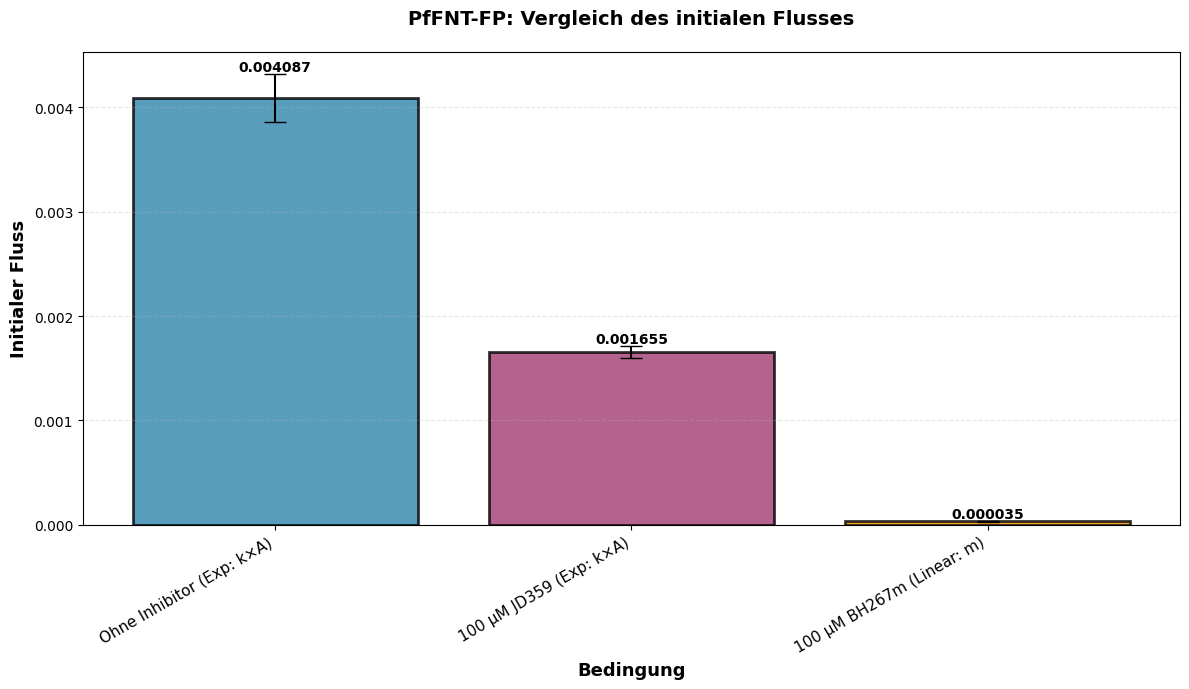


=== PfFNT-FP: Initialer Fluss Zusammenfassung ===
Bedingung                           Initialer Fluss     
-------------------------------------------------------
Ohne Inhibitor (Exp: k×A)           0.004087±0.000231
100 µM JD359 (Exp: k×A)             0.001655±0.000056
100 µM BH267m (Linear: m)           0.000035±0.000005


In [11]:
# Histogramm: Initialer Fluss nur für PfFNT-FP Proben
# Für exponentielle Fits: k * A
# Für lineare Fits (BH267m): m (Steigung)

from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

# Nur PfFNT-FP Datensätze
pfnt_fp_data_frames = [
    ('Ohne Inhibitor', 'o', E_PfFNT_FP, 'exp'),
    ('100 µM JD359', 's', E_PfFNT_FP_100µM_JD359, 'exp'),
    ('100 µM BH267m', '^', E_PfFNT_FP_100µM_BH267m, 'linear')
]

initial_flux_names_fp = []
initial_flux_values_fp = []
initial_flux_errors_fp = []

# Berechne initialen Fluss für PfFNT-FP Datensätze
for name, marker, df, fit_type in pfnt_fp_data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        if fit_type == 'linear':
            # Linearer Fit: y = m*t + b
            # Initialer Fluss = m (Steigung)
            coeffs = np.polyfit(times_clean, means_clean, 1)
            m_fit, b_fit = coeffs
            
            # Berechne Unsicherheit für m
            y_pred = np.polyval(coeffs, times_clean)
            residuals = means_clean - y_pred
            s_err = np.sqrt(np.sum(residuals**2) / (len(times_clean) - 2))
            t_mean = np.mean(times_clean)
            s_xx = np.sum((times_clean - t_mean)**2)
            m_err = s_err / np.sqrt(s_xx)
            
            initial_flux_names_fp.append(f'{name} (Linear: m)')
            initial_flux_values_fp.append(m_fit)
            initial_flux_errors_fp.append(m_err)
        else:
            # Exponentieller Fit: y = A*exp(-k*t) + C
            # Initialer Fluss = k * A (Transportrate * Amplitude)
            A_guess = means_clean[0] - means_clean[-1]
            C_guess = means_clean[-1]
            k_guess = 0.01
            
            popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                                  p0=[A_guess, k_guess, C_guess],
                                  maxfev=10000)
            
            A_fit, k_fit, C_fit = popt
            
            # Berechne Unsicherheiten
            A_err = np.sqrt(pcov[0,0])
            k_err = np.sqrt(pcov[1,1])
            
            # Initialer Fluss = k * A
            initial_flux = k_fit * A_fit
            # Fehlerfortpflanzung: Δ(k*A) = √((A * Δk)² + (k * ΔA)²)
            initial_flux_err = np.sqrt((A_fit * k_err)**2 + (k_fit * A_err)**2)
            
            initial_flux_names_fp.append(f'{name} (Exp: k×A)')
            initial_flux_values_fp.append(initial_flux)
            initial_flux_errors_fp.append(initial_flux_err)
    
    except Exception as e:
        print(f'Berechnung für {name} fehlgeschlagen: {e}')

# Erstelle Histogramm
fig, ax = plt.subplots(figsize=(12, 7))

x_pos = np.arange(len(initial_flux_names_fp))
colors = ['#2E86AB', '#A23B72', '#F18F01']  # Unterschiedliche Farben für jede Bedingung

bars = ax.bar(x_pos, initial_flux_values_fp, yerr=initial_flux_errors_fp, capsize=8, 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

ax.set_xlabel('Bedingung', fontsize=13, fontweight='bold')
ax.set_ylabel('Initialer Fluss', fontsize=13, fontweight='bold')
ax.set_title('PfFNT-FP: Vergleich des initialen Flusses', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(initial_flux_names_fp, rotation=30, ha='right', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, value, error) in enumerate(zip(bars, initial_flux_values_fp, initial_flux_errors_fp)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error,
            f'{value:.6f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'PfFNT_FP_Initial_Flux.png')
os.makedirs(os.path.join('..', 'figures'), exist_ok=True)
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved PfFNT-FP initial flux comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== PfFNT-FP: Initialer Fluss Zusammenfassung ===')
print(f'{"Bedingung":<35} {"Initialer Fluss":<20}')
print('-' * 55)
for name, flux, flux_err in zip(initial_flux_names_fp, initial_flux_values_fp, initial_flux_errors_fp):
    print(f'{name:<35} {flux:.6f}±{flux_err:.6f}')


Saved linear fits (0-60s): ../figures/PfFNT_FP_Linear_Fit_60s.png


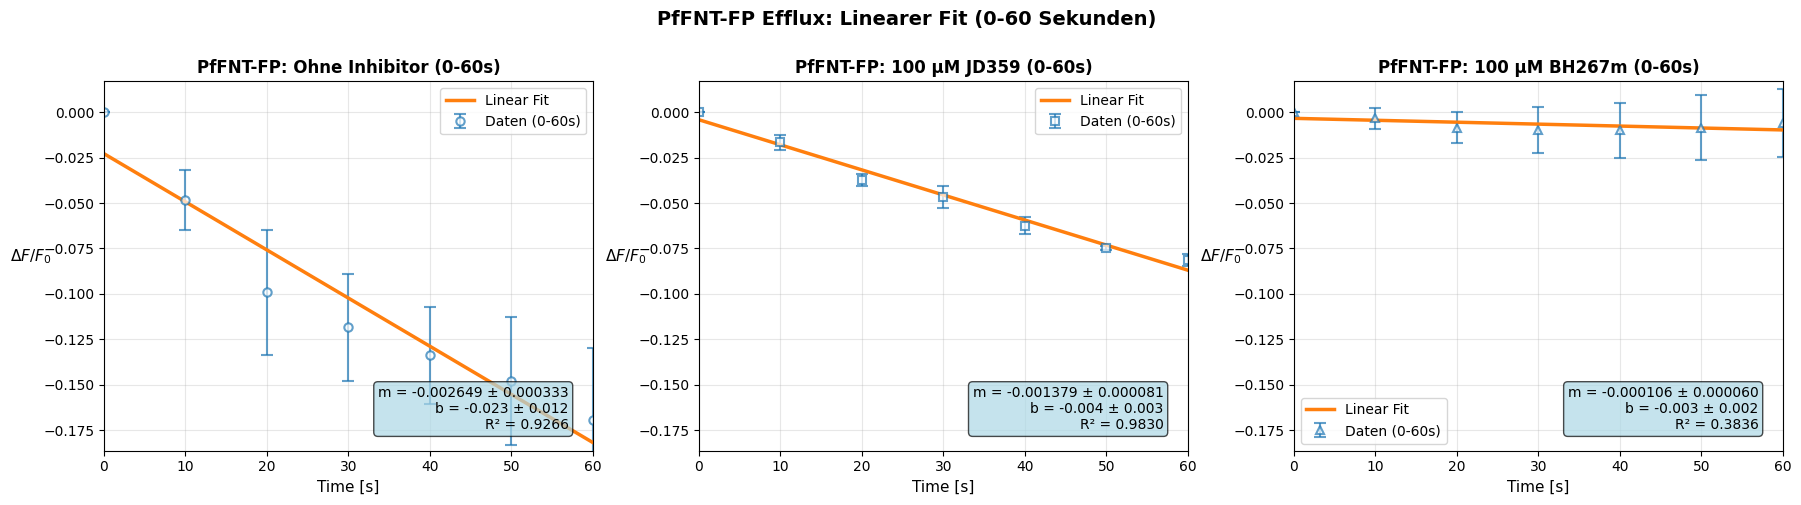

Saved slopes comparison: ../figures/PfFNT_FP_Slopes_Comparison_60s.png


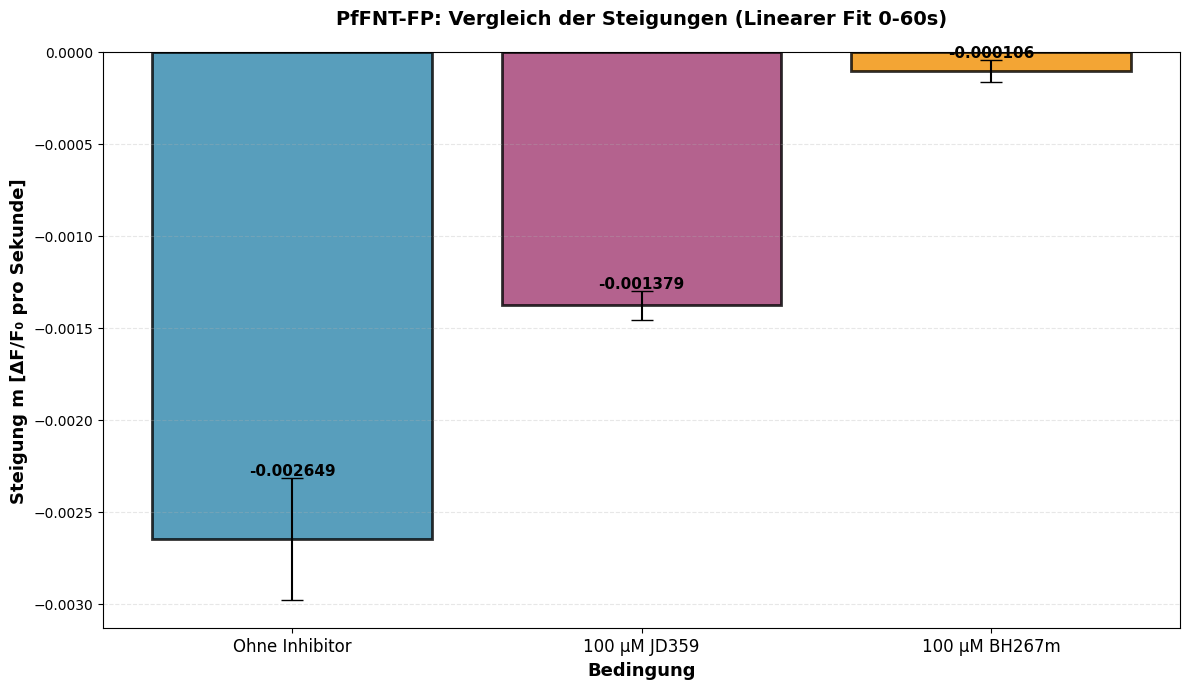


=== PfFNT-FP: Linearer Fit Zusammenfassung (0-60 Sekunden) ===
Bedingung                 Steigung m           y-Achsenabschnitt b 
-----------------------------------------------------------------
Ohne Inhibitor            -0.002649±0.000333   -0.023±0.012
100 µM JD359              -0.001379±0.000081   -0.004±0.003
100 µM BH267m             -0.000106±0.000060   -0.003±0.002

=== Prozentuale Änderung relativ zu "Ohne Inhibitor" ===
100 µM JD359              -47.9%
100 µM BH267m             -96.0%


In [12]:
# Linearer Fit in den ersten 60 Sekunden für PfFNT-FP
# Vergleich der Steigungen (m)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# PfFNT-FP Datensätze
pfnt_fp_data_frames_60s = [
    ('Ohne Inhibitor', 'o', E_PfFNT_FP),
    ('100 µM JD359', 's', E_PfFNT_FP_100µM_JD359),
    ('100 µM BH267m', '^', E_PfFNT_FP_100µM_BH267m)
]

# Listen für Parameter und Unsicherheiten
names_60s = []
slopes_60s = []
slope_errors_60s = []
intercepts_60s = []
intercept_errors_60s = []

# Erstelle 1x3 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sammle alle Daten für uniforme Skalierung
all_times_60s = []
all_values_60s = []

# Führe lineare Fits in den ersten 60 Sekunden durch
for idx, (name, marker, df) in enumerate(pfnt_fp_data_frames_60s):
    ax = axes[idx]
    
    # Extrahiere Daten
    times = df['Time'].values
    means = df['Mittelwerte'].values
    stds = df['Standardabweichung'].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Filtere auf erste 60 Sekunden
    mask_60s = times_clean <= 60
    times_60s = times_clean[mask_60s]
    means_60s = means_clean[mask_60s]
    stds_60s = stds_clean[mask_60s]
    
    # Sammle für Skalierung
    all_times_60s.extend(times_60s)
    all_values_60s.extend(means_60s)
    
    # Plotte Originaldaten
    ax.errorbar(times_60s, means_60s, yerr=stds_60s,
                marker=marker, linestyle='', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6,
                label='Daten (0-60s)', alpha=0.7, color='C0')
    
    try:
        # Linearer Fit: y = m*t + b
        coeffs = np.polyfit(times_60s, means_60s, 1)
        m_fit, b_fit = coeffs
        
        # Berechne Unsicherheiten für linearen Fit
        y_pred = np.polyval(coeffs, times_60s)
        residuals = means_60s - y_pred
        s_err = np.sqrt(np.sum(residuals**2) / (len(times_60s) - 2))
        t_mean = np.mean(times_60s)
        s_xx = np.sum((times_60s - t_mean)**2)
        m_err = s_err / np.sqrt(s_xx)
        b_err = s_err * np.sqrt(1/len(times_60s) + t_mean**2/s_xx)
        
        # Erstelle Fit-Kurve
        t_fit = np.linspace(times_60s.min(), times_60s.max(), 200)
        y_fit = m_fit * t_fit + b_fit
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, '-', linewidth=2.5, color='C1', label='Linear Fit')
        
        # Füge Fit-Parameter als Textbox hinzu
        textstr = f'm = {m_fit:.6f} ± {m_err:.6f}\nb = {b_fit:.3f} ± {b_err:.3f}\nR² = {np.corrcoef(times_60s, means_60s)[0,1]**2:.4f}'
        ax.text(0.95, 0.05, textstr, transform=ax.transAxes,
                fontsize=10, verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        # Speichere Werte
        names_60s.append(name)
        slopes_60s.append(m_fit)
        slope_errors_60s.append(m_err)
        intercepts_60s.append(b_fit)
        intercept_errors_60s.append(b_err)
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)}',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=8, color='red')
    
    # Formatierung
    ax.set_title(f'PfFNT-FP: {name} (0-60s)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time [s]', fontsize=11)
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20, fontsize=11)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=10)

# Setze uniforme Achsenskalierung für alle Subplots
if all_times_60s and all_values_60s:
    x_min, x_max = 0, 60
    y_min, y_max = min(all_values_60s), max(all_values_60s)
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('PfFNT-FP Efflux: Linearer Fit (0-60 Sekunden)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()

# Speichern
outpath = os.path.join('..', 'figures', 'PfFNT_FP_Linear_Fit_60s.png')
os.makedirs(os.path.join('..', 'figures'), exist_ok=True)
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved linear fits (0-60s): {outpath}')
plt.show()

# Erstelle Histogramm zum Vergleich der Steigungen
fig, ax = plt.subplots(figsize=(12, 7))

x_pos = np.arange(len(names_60s))
colors = ['#2E86AB', '#A23B72', '#F18F01']

bars = ax.bar(x_pos, slopes_60s, yerr=slope_errors_60s, capsize=8, 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

ax.set_xlabel('Bedingung', fontsize=13, fontweight='bold')
ax.set_ylabel('Steigung m [ΔF/F₀ pro Sekunde]', fontsize=13, fontweight='bold')
ax.set_title('PfFNT-FP: Vergleich der Steigungen (Linearer Fit 0-60s)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(names_60s, rotation=0, ha='center', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, value, error) in enumerate(zip(bars, slopes_60s, slope_errors_60s)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error,
            f'{value:.6f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'PfFNT_FP_Slopes_Comparison_60s.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved slopes comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== PfFNT-FP: Linearer Fit Zusammenfassung (0-60 Sekunden) ===')
print(f'{"Bedingung":<25} {"Steigung m":<20} {"y-Achsenabschnitt b":<20}')
print('-' * 65)
for name, m, m_e, b, b_e in zip(names_60s, slopes_60s, slope_errors_60s, intercepts_60s, intercept_errors_60s):
    print(f'{name:<25} {m:.6f}±{m_e:.6f}   {b:.3f}±{b_e:.3f}')

# Berechne prozentuale Unterschiede relativ zum Kontrollzustand (Ohne Inhibitor)
print(f'\n=== Prozentuale Änderung relativ zu "Ohne Inhibitor" ===')
control_slope = slopes_60s[0]
for i, name in enumerate(names_60s):
    if i > 0:
        percent_change = ((slopes_60s[i] - control_slope) / control_slope) * 100
        print(f'{name:<25} {percent_change:+.1f}%')


Saved linear fits (0-60s): ../figures/PfFNT_ilacco1.0_Linear_Fit_60s.png


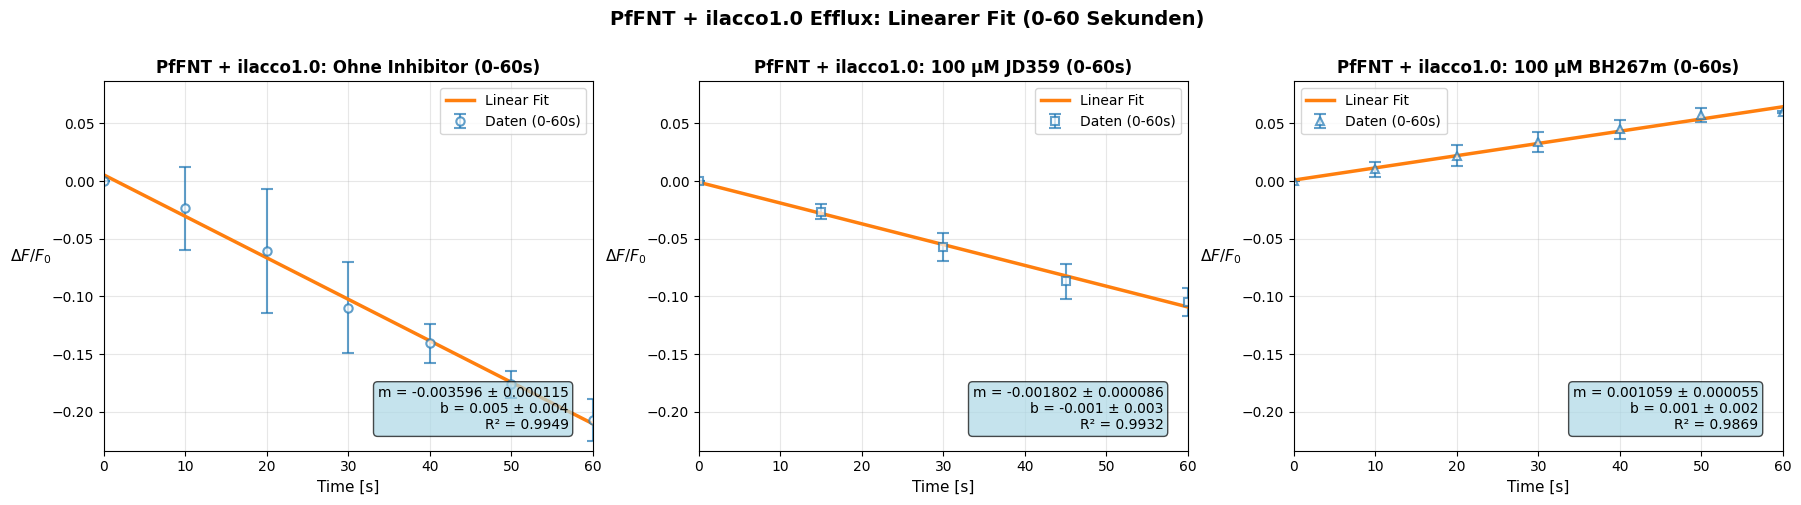

Saved slopes comparison: ../figures/PfFNT_ilacco1.0_Slopes_Comparison_60s.png


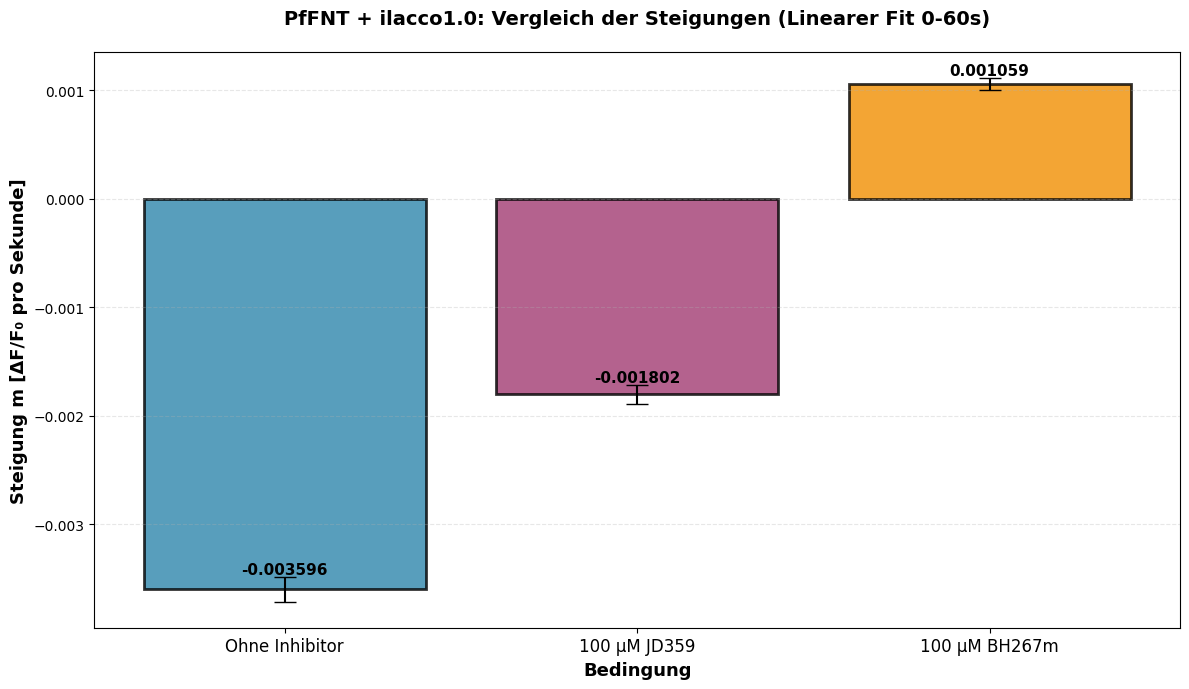


=== PfFNT + ilacco1.0: Linearer Fit Zusammenfassung (0-60 Sekunden) ===
Bedingung                 Steigung m           y-Achsenabschnitt b 
-----------------------------------------------------------------
Ohne Inhibitor            -0.003596±0.000115   0.005±0.004
100 µM JD359              -0.001802±0.000086   -0.001±0.003
100 µM BH267m             0.001059±0.000055   0.001±0.002

=== Prozentuale Änderung relativ zu "Ohne Inhibitor" ===
100 µM JD359              -49.9%
100 µM BH267m             -129.5%


In [13]:
# Linearer Fit in den ersten 60 Sekunden für PfFNT (+ ilacco1.0)
# Vergleich der Steigungen (m)

import numpy as np
import matplotlib.pyplot as plt

# PfFNT Datensätze
pfnt_data_frames_60s = [
    ('Ohne Inhibitor', 'o', E_PfFNT_ilacco1_0),
    ('100 µM JD359', 's', E_PfFNT_100µM_JD359),
    ('100 µM BH267m', '^', E_PfFNT_100µM_BH267m)
]

# Listen für Parameter und Unsicherheiten
names_pfnt_60s = []
slopes_pfnt_60s = []
slope_errors_pfnt_60s = []
intercepts_pfnt_60s = []
intercept_errors_pfnt_60s = []

# Erstelle 1x3 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sammle alle Daten für uniforme Skalierung
all_times_pfnt_60s = []
all_values_pfnt_60s = []

# Führe lineare Fits in den ersten 60 Sekunden durch
for idx, (name, marker, df) in enumerate(pfnt_data_frames_60s):
    ax = axes[idx]
    
    # Extrahiere Daten
    times = df['Time'].values
    means = df['Mittelwerte'].values
    stds = df['Standardabweichung'].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Filtere auf erste 60 Sekunden
    mask_60s = times_clean <= 60
    times_60s = times_clean[mask_60s]
    means_60s = means_clean[mask_60s]
    stds_60s = stds_clean[mask_60s]
    
    # Sammle für Skalierung
    all_times_pfnt_60s.extend(times_60s)
    all_values_pfnt_60s.extend(means_60s)
    
    # Plotte Originaldaten
    ax.errorbar(times_60s, means_60s, yerr=stds_60s,
                marker=marker, linestyle='', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6,
                label='Daten (0-60s)', alpha=0.7, color='C0')
    
    try:
        # Linearer Fit: y = m*t + b
        coeffs = np.polyfit(times_60s, means_60s, 1)
        m_fit, b_fit = coeffs
        
        # Berechne Unsicherheiten für linearen Fit
        y_pred = np.polyval(coeffs, times_60s)
        residuals = means_60s - y_pred
        s_err = np.sqrt(np.sum(residuals**2) / (len(times_60s) - 2))
        t_mean = np.mean(times_60s)
        s_xx = np.sum((times_60s - t_mean)**2)
        m_err = s_err / np.sqrt(s_xx)
        b_err = s_err * np.sqrt(1/len(times_60s) + t_mean**2/s_xx)
        
        # Erstelle Fit-Kurve
        t_fit = np.linspace(times_60s.min(), times_60s.max(), 200)
        y_fit = m_fit * t_fit + b_fit
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, '-', linewidth=2.5, color='C1', label='Linear Fit')
        
        # Füge Fit-Parameter als Textbox hinzu
        textstr = f'm = {m_fit:.6f} ± {m_err:.6f}\nb = {b_fit:.3f} ± {b_err:.3f}\nR² = {np.corrcoef(times_60s, means_60s)[0,1]**2:.4f}'
        ax.text(0.95, 0.05, textstr, transform=ax.transAxes,
                fontsize=10, verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        # Speichere Werte
        names_pfnt_60s.append(name)
        slopes_pfnt_60s.append(m_fit)
        slope_errors_pfnt_60s.append(m_err)
        intercepts_pfnt_60s.append(b_fit)
        intercept_errors_pfnt_60s.append(b_err)
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)}',
                transform=ax.transAxes, ha='center', va='center',
                fontsize=8, color='red')
    
    # Formatierung
    ax.set_title(f'PfFNT + ilacco1.0: {name} (0-60s)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time [s]', fontsize=11)
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20, fontsize=11)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=10)

# Setze uniforme Achsenskalierung für alle Subplots
if all_times_pfnt_60s and all_values_pfnt_60s:
    x_min, x_max = 0, 60
    y_min, y_max = min(all_values_pfnt_60s), max(all_values_pfnt_60s)
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('PfFNT + ilacco1.0 Efflux: Linearer Fit (0-60 Sekunden)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()

# Speichern
outpath = os.path.join('..', 'figures', 'PfFNT_ilacco1.0_Linear_Fit_60s.png')
os.makedirs(os.path.join('..', 'figures'), exist_ok=True)
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved linear fits (0-60s): {outpath}')
plt.show()

# Erstelle Histogramm zum Vergleich der Steigungen
fig, ax = plt.subplots(figsize=(12, 7))

x_pos = np.arange(len(names_pfnt_60s))
colors = ['#2E86AB', '#A23B72', '#F18F01']

bars = ax.bar(x_pos, slopes_pfnt_60s, yerr=slope_errors_pfnt_60s, capsize=8, 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

ax.set_xlabel('Bedingung', fontsize=13, fontweight='bold')
ax.set_ylabel('Steigung m [ΔF/F₀ pro Sekunde]', fontsize=13, fontweight='bold')
ax.set_title('PfFNT + ilacco1.0: Vergleich der Steigungen (Linearer Fit 0-60s)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(names_pfnt_60s, rotation=0, ha='center', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, value, error) in enumerate(zip(bars, slopes_pfnt_60s, slope_errors_pfnt_60s)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error,
            f'{value:.6f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()

outpath = os.path.join('..', 'figures', 'PfFNT_ilacco1.0_Slopes_Comparison_60s.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved slopes comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== PfFNT + ilacco1.0: Linearer Fit Zusammenfassung (0-60 Sekunden) ===')
print(f'{"Bedingung":<25} {"Steigung m":<20} {"y-Achsenabschnitt b":<20}')
print('-' * 65)
for name, m, m_e, b, b_e in zip(names_pfnt_60s, slopes_pfnt_60s, slope_errors_pfnt_60s, intercepts_pfnt_60s, intercept_errors_pfnt_60s):
    print(f'{name:<25} {m:.6f}±{m_e:.6f}   {b:.3f}±{b_e:.3f}')

# Berechne prozentuale Unterschiede relativ zum Kontrollzustand (Ohne Inhibitor)
print(f'\n=== Prozentuale Änderung relativ zu "Ohne Inhibitor" ===')
control_slope = slopes_pfnt_60s[0]
for i, name in enumerate(names_pfnt_60s):
    if i > 0:
        percent_change = ((slopes_pfnt_60s[i] - control_slope) / control_slope) * 100
        print(f'{name:<25} {percent_change:+.1f}%')
